In [8]:
# Отключение предупреждений
import warnings

warnings.filterwarnings('ignore')

# Отображение графиков plotly в jupyter
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Подключение библиотек из файла
from library import *

<h2> Загрузка данных </h2>

In [9]:
# Загрузка набора данных
data = pd.read_csv("D:\\ML\Data for training\marketing_campaign.csv", sep=';')
# Создание копии набора данных
copy_df = data.copy()
# Отображение 100 столбцов датафрейма
pd.options.display.max_columns = 100

<h2 id=> Знакомство с данными</h2>

In [10]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Получив информацию о датафрейме, имеем:
<li> 26 численных переменных </li>
<li> 3 категориальныe переменныe</li>

<h4> Сводная статистика по набору данных с исключением ID, количества детей и меток класса </h4>

In [12]:
data.drop(["ID", "Response", "Kidhome", "Teenhome"], axis=1).describe().drop("count")

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0


<h4 id="Missing_values"> Изучение пропущенных значений</h4>

In [13]:
# Выборка строк, в которых есть пропущенные значения
count_missed_data = data.isna().sum() > 0
# Вывод количества пропущенных значений
print(f"Пропущено {data.isna().sum()[count_missed_data][0]} значения")

Пропущено 24 значения


In [14]:
# Строки, в которых пропущено значение о доходе
data[data["Income"].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


<h4> Первоначальная обработка данных </h4>

In [15]:
# Замена Graduation на Bachelor
copy_df["Education"] = data["Education"].replace({"Graduation": "Bachelor"})

# Определение возраста
copy_df["Age"] = 2014 - copy_df["Year_Birth"]

# Подсчет всех трат
# Список для категорий товаров
product_categories = ["MntWines", "MntFruits", "MntMeatProducts",
                      "MntFishProducts", "MntSweetProducts",
                      "MntGoldProds"]
# Вычисление расходов с помощью суммирования столбцов
copy_df["Spending"] = data[product_categories].sum(axis=1)

# Разделение семейного положения на [в паре] - 1 и [нет] - 0
copy_df["Marital_Status"] = copy_df["Marital_Status"].\
        apply(lambda x: "In couple" if x == "Married"
                                    or x == "Together" else "Alone")
# Сколько лет зарегистрирован
copy_df["Years_registered"] = 2014 - pd.DatetimeIndex(copy_df["Dt_Customer"]).year

# Определение возрастной группы
copy_df.loc[copy_df["Age"] < 35, "Age_group"] = "Young"
copy_df.loc[(copy_df["Age"] >= 35) &
                               (copy_df["Age"] < 65), "Age_group"] = "Adults"
copy_df.loc[copy_df["Age"] >= 65, "Age_group"] = "Elderly"

# Есть ли дети, бинарный признак
copy_df.loc[copy_df["Kidhome"] + copy_df["Teenhome"] >= 1, "Have_child"] = "Yes"
copy_df.loc[copy_df["Kidhome"] + copy_df["Teenhome"] == 0, "Have_child"] = "No"
# Количество детей
copy_df["Number_childs"] = copy_df[["Kidhome", "Teenhome"]].sum(axis=1)

In [16]:
# Заполнение пропущенных значений
# Метод заполнения пробелов
imputer = KNNImputer(n_neighbors=15, metric="nan_euclidean")
# Обучение и восстановление пропущенных значений
X = imputer.fit_transform(copy_df[["Income", "Age"]])
# Вставка пропущенных значений
copy_df['Income'] = X[:, 0]

# Отношение расходов к доходу
copy_df["Spending_to_Income"] = copy_df["Spending"] / copy_df["Income"] * 100

In [17]:
# Группа молодых людей
young_group = copy_df[copy_df["Age"] < 30]
# Группа взрослых
adult_group = copy_df[(copy_df["Age"] >= 30) & (copy_df["Age"] < 65)]
# Группа людей в возрасте
elderly_group = copy_df[copy_df["Age"] >= 65]

<h3> EDA </h3>

In [18]:
# Столбчатая диаграмма количества меток
px.bar(data["Response"].value_counts(), width=600,
       title="Количество меток класса", text_auto=True)

In [19]:
# Качество образования
px.bar(copy_df["Education"].value_counts(),
              title="Имеющееся образование у группы", width=600, text_auto=True)

In [20]:
# Семейное положение
px.bar(copy_df["Marital_Status"].value_counts(),
              title="Семейное положение группы", width=600, text_auto=True)

In [21]:
# Анализирование доходов и расходов
education_groups = copy_df.groupby("Education")[
    "Income", "Spending", "Age", "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts",
    "MntGoldProds"].agg("mean").reset_index()

# Вывод графика
px.bar(education_groups, x="Education", y=["Income", "Spending"],
              barmode='stack', title="Доходы/расходы для людей "
                                     "с разным образованием", height=550,
              text_auto=True)

In [22]:
# Анализирование расходов на категории товаров по образованию
px.bar(education_groups, x="Education",
              y=product_categories,
              barmode="group",
              title="Расходы по категориям товаров в зависимости от образования")

In [23]:
# Определение расходов и доходов по возрастной группе
# Данные по возрастным группам
age_groups = copy_df.groupby("Age_group")[
    "Income", "Spending", "Age", "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts",
    "MntGoldProds"].agg("mean").reset_index()
px.bar(age_groups, x="Age_group",
              y=["Income", "Spending"],
              barmode='stack', title="Доходы/расходы для людей "
                                     "из разных возрастных групп", height=550,
              text_auto=True)

In [24]:
px.bar(age_groups, x="Age_group", y=product_categories, barmode="group",
       title="Расходы по категориям товаров для различных возрастных групп")

In [25]:
# Определение выбросов
px.box(copy_df, x="Age_group", y="Income",
              title="Доходы в зависимости от возрастной группы")

In [26]:
px.box(copy_df, y=["Income", "Spending"], title="Выбросы в доходах и расходах")\
    .update_traces(quartilemethod="exclusive")

In [27]:
px.bar(copy_df.groupby("Have_child")[["Income", "Spending"]].mean().reset_index(),
       x="Have_child", y=["Income", "Spending"],
       title="Заработок/траты для людей с детьми и без", height=600,
       text_auto=True, barmode="stack")

In [28]:
px.bar(copy_df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
         'AcceptedCmp2']].sum(axis=0), text_auto=True,
       title="Популярность компаний у клиентов")

In [29]:
# Удаление выброса в доходах
copy_df.drop(copy_df[copy_df["Income"] > 600_000].index[0], inplace=True)
copy_df.shape

(2239, 36)

<h4 id="Fill_missing_values">Заполнение пропущенных значений с помощью метода К ближайших соседей на основе информации о возрасте и доходе</h4>

In [30]:
from sklearn.impute import KNNImputer

# Метод заполнения пробелов
imputer=KNNImputer(n_neighbors=11, metric="nan_euclidean")
# Обучение и восстановление пропущенных значений
X = imputer.fit_transform(copy_df[["Income", "Age"]])
# Вставка пропущенных значений
copy_df['Income'] = X[:, 0]

In [31]:
print(f"Количество строк в датафрейме после удаления: {len(copy_df)}")

Количество строк в датафрейме после удаления: 2239


<h4 id="Stat_test"> Проверка статистической значимости между PhD и Master группами </h4>

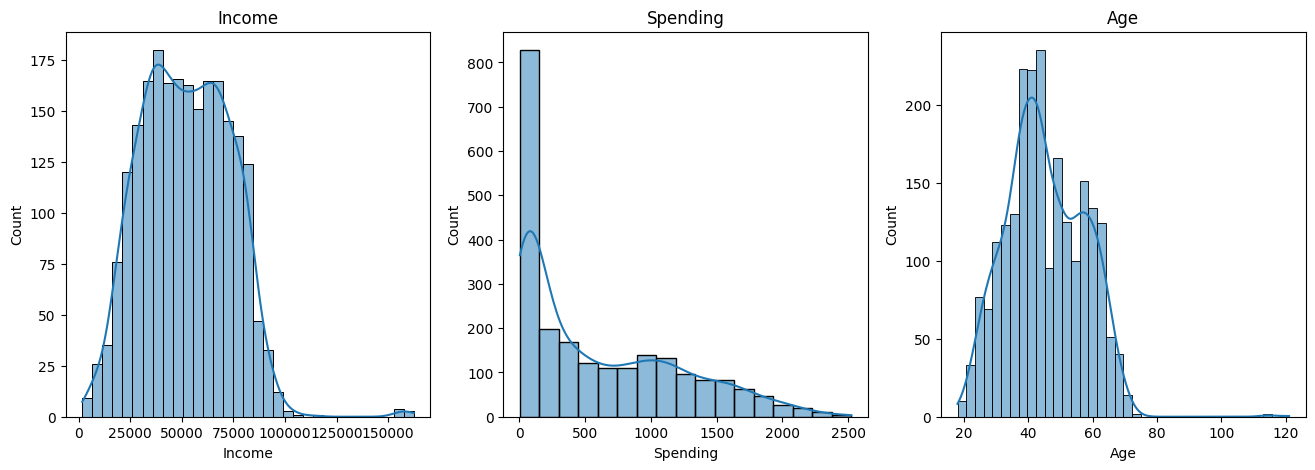

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))

sns.histplot(copy_df["Income"], kde=True, ax=axes[0])
sns.histplot(copy_df["Spending"], kde=True, ax=axes[1])
sns.histplot(copy_df["Age"], kde=True, ax=axes[2])

axes[0].set_title("Income")
axes[1].set_title("Spending")
axes[2].set_title("Age");

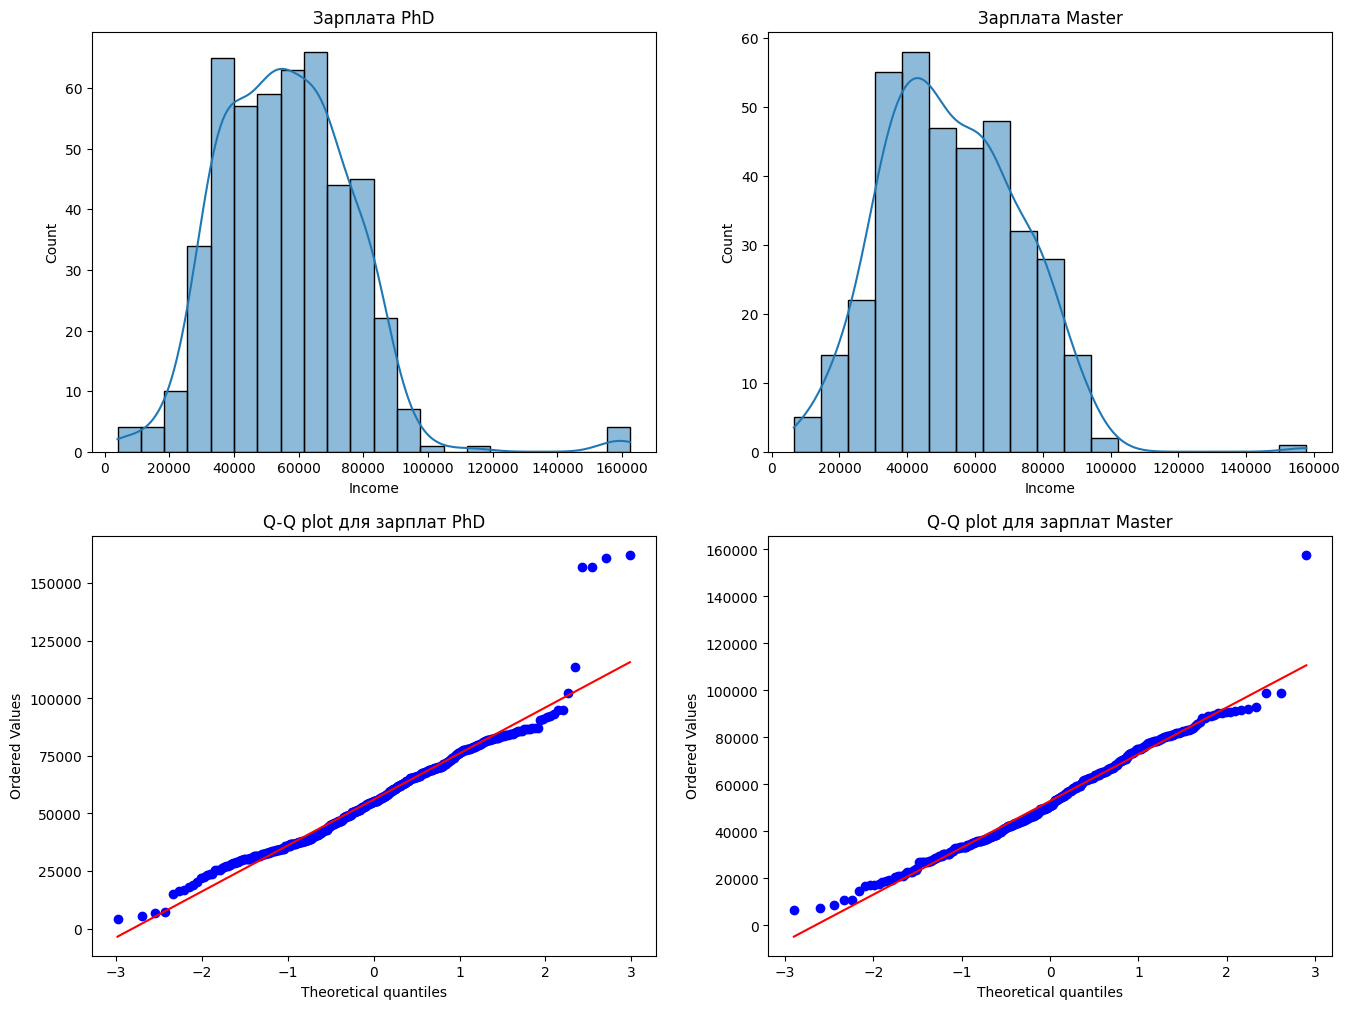

In [33]:

# Проверка на то, есть ли значимая разница между заработком людей с PhD и Master
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.histplot(copy_df.loc[copy_df["Education"] == "PhD", "Income"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Зарплата PhD")

stats.probplot(copy_df.loc[copy_df["Education"] == "PhD", "Income"], dist="norm",
               plot=axes[1, 0])
axes[1, 0].set_title("Q-Q plot для зарплат PhD")

sns.histplot(copy_df.loc[copy_df["Education"] == "Master", "Income"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Зарплата Master")

stats.probplot(copy_df.loc[copy_df["Education"] == "Master", "Income"], dist="norm",
               plot=axes[1, 1])
axes[1, 1].set_title("Q-Q plot для зарплат Master");

<h5> Учитывая ненормальность данных, будет применен тест Манна-Уитни

<li>
    <i>
        H<sub>0</sub>: Нулевая гипотеза - связь отсутствует. p value >= &alpha;
    </i>
</li>

<li>
    <i>
        H<sub>1</sub>: Альтернативная гипотеза - между выборками есть различия. p value < &alpha;
    </i>
</li>



In [34]:
import scipy.stats as stats
stats.mannwhitneyu(copy_df.loc[copy_df["Education"] == "PhD", "Income"],
                   copy_df.loc[copy_df["Education"] == "Master", "Income"])

MannwhitneyuResult(statistic=97542.5, pvalue=0.03319584303556402)

<h5> Учитывая что полученное p значение меньше 0.05, отклоняем нулевую гипотезу </h5>

In [35]:
# Признаки
X = copy_df.drop(["Response", "ID", "Year_Birth", "Kidhome", "Teenhome",
                  "Dt_Customer", "Z_CostContact", "Age_group",
                  "Z_Revenue", "MntWines", "Spending"], axis=1)

X["Spending_to_Wine"] = copy_df["MntWines"] / copy_df["Spending"]
# Метки
y = copy_df["Response"]

In [36]:
# Кодирование признаков
# Кодирование образования
X["Education"] = LabelEncoder().fit_transform(X["Education"])
# Кодирование семейного положения
X["Marital_Status"] = LabelEncoder().fit_transform(X["Marital_Status"])
# Кодирование признака "наличие детей"
X["Have_child"] = LabelEncoder().fit_transform(X["Have_child"])

In [37]:
# Численные признаки
numeric_col = pd.Series(list(range(0, X.shape[1])))\
    .drop([0, 1, 22, 14, 15, 16, 17, 18, 19, 21, 22])

In [38]:
X.loc[X["Spending_to_Wine"] == np.inf] = 0

In [39]:
# Чтобы сохранить название столбцов, стандартизируем каждый столбец поэтапно
for x in numeric_col:
    sc = StandardScaler()
    X.iloc[:, x] = sc.fit_transform(np.array(X.iloc[:, x]).reshape(-1, 1))

<h4> Определение вклада признаков Случайный лес </h4>

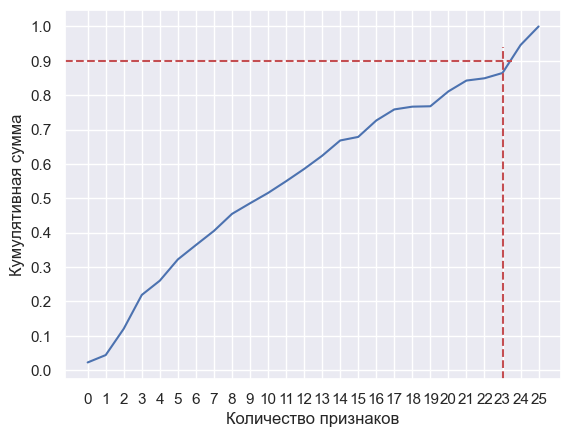

In [40]:
# Обучение случайного леса для оценки важности признаков
rf1 = RandomForestClassifier()
# Обучение случайного леса
rf1.fit(X, y)

# Использование темы для графика
sns.set_theme()
# Кумулятивная сумма признаков, оцениваемая случайным лесом
ax = sns.lineplot(x=list(range(len(rf1.feature_importances_))), y=rf1.feature_importances_.cumsum())
# Метки для оси Y
ax.set_yticks(np.linspace(0, 1, 11))
# Метки для оси X
ax.set_xticks(list(range(len(rf1.feature_importances_))))
# Описание оси Х
ax.set_xlabel("Количество признаков")
# Описание оси Y
ax.set_ylabel("Кумулятивная сумма")
# Построение красной линии
ax.axhline(0.9, xmax=0.9, color='r', linestyle='--')
ax.axvline(23, ymax=0.9, color='r', linestyle='--');

<h4> Определение вклада признаков PCA </h4>

In [41]:
pca = PCA(n_components=None)
pca.fit_transform(X, y)
print(f"Количество переменных, необходимое для покрытия 95% признакового "
      f"пространства: {(pd.Series(pca.explained_variance_ratio_).cumsum() > 0.95).argmax() + 1}")

Количество переменных, необходимое для покрытия 95% признакового пространства: 16


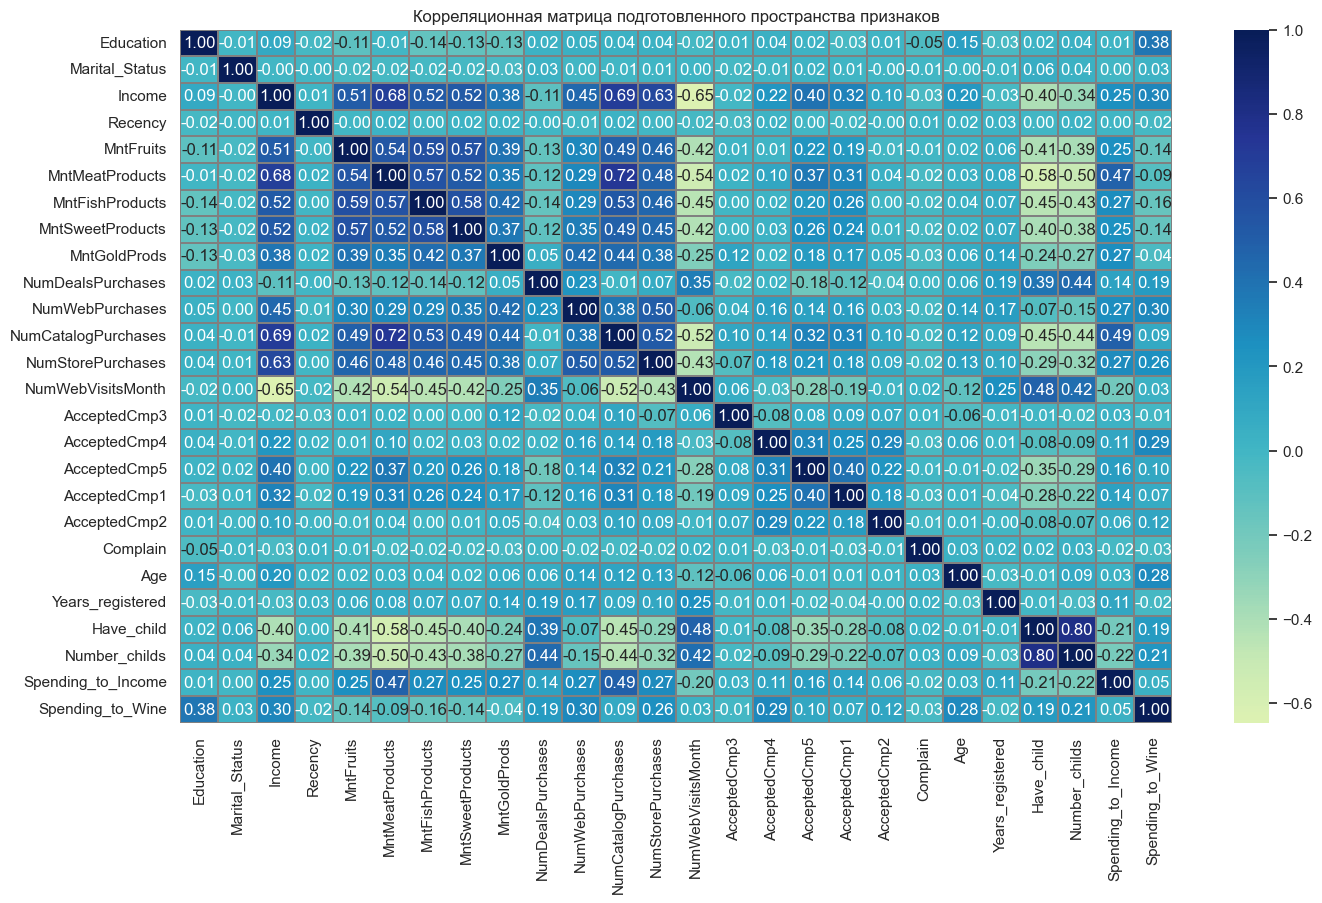

In [42]:
plt.subplots(figsize=(16, 9))
sns.heatmap(X.corr(),
            fmt=".2f", annot=True, cmap="YlGnBu", center=0,
            linewidths=0.01, linecolor='gray')
plt.title("Корреляционная матрица подготовленного пространства признаков");

<li> Между доходом и тратами на различные группы товаров высокая связь. Люди с доходом повыше больше тратятся на мясные продукты.
Также и между доходом и количеством покупок на сайте/через каталог. Это связано с большим доходом </li>
<br>
<li> Люди с детьми чаще делают покупки по скидкам. Присутствует средняя сила связи
<ul> Также стоит отметить, что траты у людей с детьми ниже, количество посещений сайтов наоборот выше.</ul>
</li>


In [43]:
select_pipeline = make_pipeline(SelectKBest(), RandomForestClassifier())

params = {'selectkbest__k': list(range(0, 24))}
gs = GridSearchCV(select_pipeline, param_grid=params, n_jobs=4)
gs.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'selectkbest__k': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18, 19,
                                            20, 21, 22, 23]})

In [44]:
gs.best_params_

{'selectkbest__k': 15}

In [45]:
# Отбор 13 наиболее влиятельных признаков
select_k_best = SelectKBest(k=13)
select_k_best.fit_transform(X, y)
index_columns = select_k_best.get_feature_names_out()

In [46]:
# Измененный порядок столбцов
reindexed_columns = ['Marital_Status', 'Income', 'Recency', 'MntMeatProducts',
                     'NumCatalogPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
                     'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'Years_registered', 'Have_child', 'Number_childs']
# Изменение порядка столбцов в срезе датафрейма с 13 наиболее влиятельными признаками
X = X[index_columns].reindex(reindexed_columns, axis="columns")

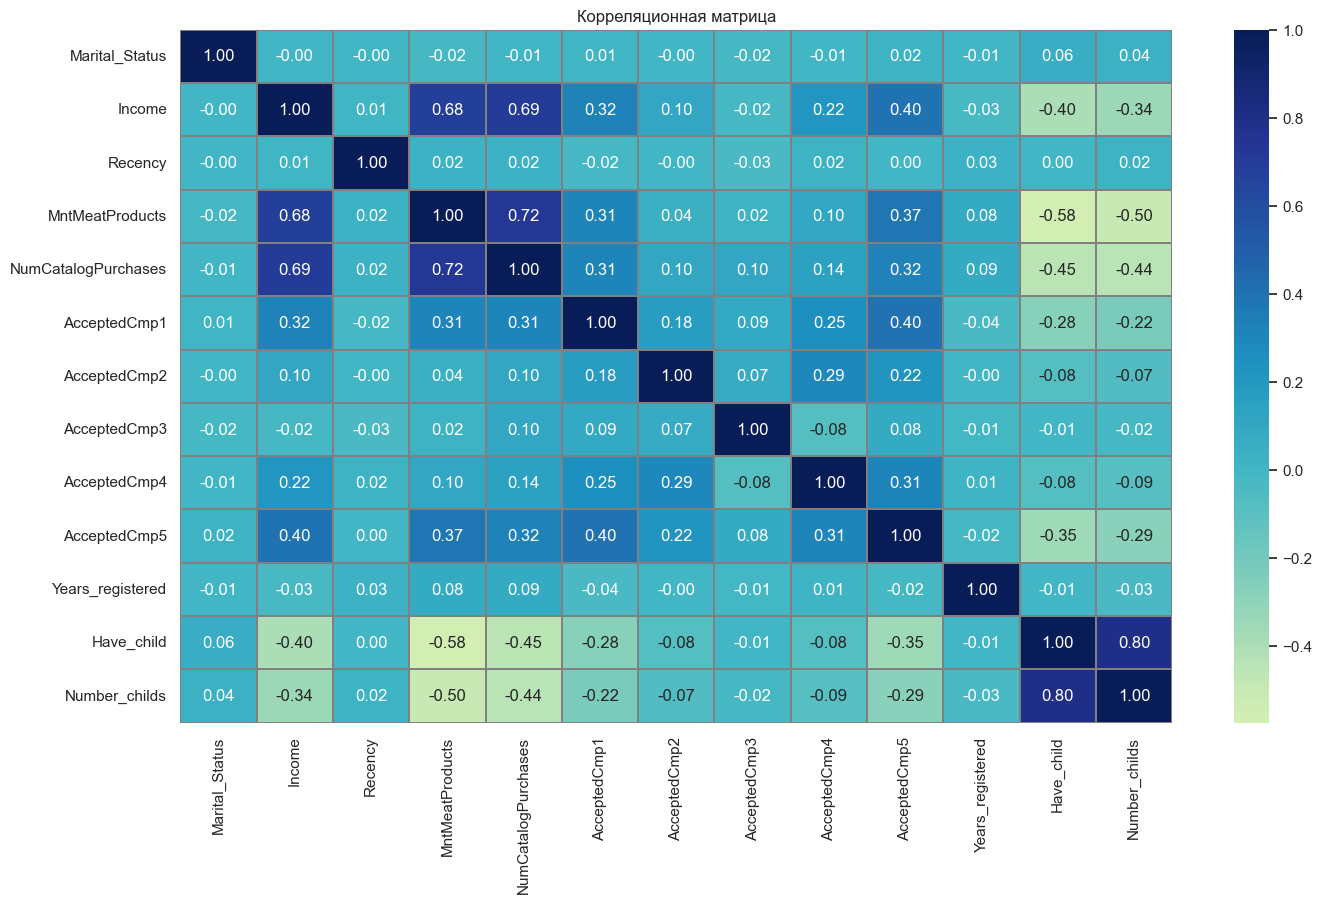

In [47]:
plt.subplots(figsize=(16, 9))
sns.heatmap(X.corr(), fmt=".2f",
            annot=True, cmap="YlGnBu", center=0, linewidths=0.01, linecolor='gray')
plt.title("Корреляционная матрица");

In [48]:
result_df = X

<h2 id="Modeling"><i>Modeling</h2>

<h5> Балансировка набора данных </h5>

In [49]:
X_resampled, y_resampled = SMOTE(k_neighbors=15).fit_resample(result_df.values, y.values)
X_resampled.shape, y_resampled.shape

((3810, 13), (3810,))

In [50]:
X_tunable, X_valid, y_tunable, y_valid = train_test_split(X_resampled, y_resampled,
                                                          test_size=0.25,
                                                          random_state=42)

<h4 id="SVM"> SVC</h4>

In [51]:
# Линейный классификатор на основе опорных векторов
linear_svc_pipeline = make_pipeline(SMOTE(), LinearSVC())
print("Полученная правильность для линейного метода опорных векторов: ")
cross_val_score(linear_svc_pipeline, X_resampled, y_resampled, cv=10).mean()

Полученная правильность для линейного метода опорных векторов: 


0.7952755905511812

In [52]:
# Опорные вектора с полиминальным ядром
kernel_svc = SVC(kernel='rbf')
print("Полученная правильность для метода опорных векторов с ядром rbf: ")
cross_val_score(kernel_svc, X_resampled, y_resampled, cv=10).mean()

Полученная правильность для метода опорных векторов с ядром rbf: 


0.8640419947506561

<h4> Настройка параметров SVC </h4>
<h5> Первоначально найдем хорошие параметры из предложенных с помощью случайного поиска. Более точная настройка будет производиться с помощью решетчатого поиска </h5>

<h5> Рандомизированный поиск </h5>

In [53]:
# Настраиваемые параметры и их возможные значения
random_search_params = {
    'C': [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e4],
    'degree': list(range(5, 15)),
    'gamma': ['auto', 'scale'],
    'kernel': ['poly', 'rbf']
}

In [54]:
# Случайный поиск с 20 итерациями
randomize_search = RandomizedSearchCV(estimator=kernel_svc, n_jobs=4,
                                      param_distributions=random_search_params,
                                      n_iter=20)
# Подгонка параметров
randomize_search.fit(X_tunable, y_tunable)
# Лучшие параметры и лучшая достигнутая правильность
randomize_search.best_params_, randomize_search.best_score_

({'kernel': 'rbf', 'gamma': 'scale', 'degree': 8, 'C': 1000.0},
 0.9034015896537788)

<h5> Решетчатый поиск </h5>
<h6> Учитывая, что для ядра rbf количество степеней настраивать не нужно, этот параметр будет пропущен </h6>

In [55]:
grid_params = {
    'C': np.linspace(0, 1000, 15),
    'kernel': ['rbf'],
    'gamma': ['auto']
}

In [56]:
# Решетчатый поиск с 8 k-блоками
grid_search = GridSearchCV(estimator=kernel_svc, n_jobs=4,
                           param_grid=grid_params, cv=8)
grid_search.fit(X_tunable, y_tunable)

GridSearchCV(cv=8, estimator=SVC(), n_jobs=4,
             param_grid={'C': array([   0.        ,   71.42857143,  142.85714286,  214.28571429,
        285.71428571,  357.14285714,  428.57142857,  500.        ,
        571.42857143,  642.85714286,  714.28571429,  785.71428571,
        857.14285714,  928.57142857, 1000.        ]),
                         'gamma': ['auto'], 'kernel': ['rbf']})

In [57]:
grid_search.best_params_, grid_search.best_score_

({'C': 1000.0, 'gamma': 'auto', 'kernel': 'rbf'}, 0.9034034004663318)

<h6> Рандомизированный поиск нашел параметры весьма точно </h6>

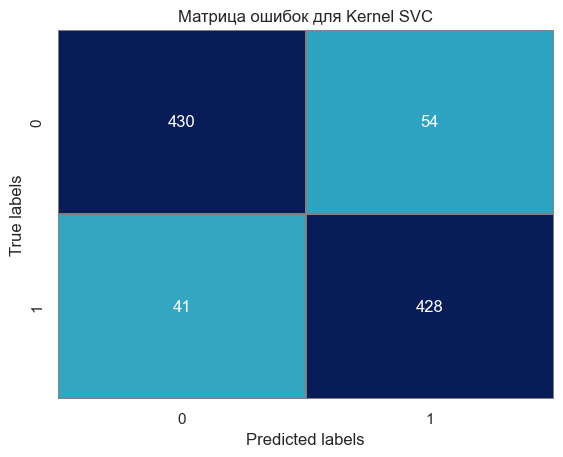

In [58]:
# Предсказание меток на основе
y_pred = grid_search.best_estimator_.predict(X_valid)
conf_matrix = sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True,
                          fmt=".0f", cmap="YlGnBu", center=0,
                          linewidths=0.01, linecolor='gray', cbar=False)
conf_matrix.set(ylabel="True labels", xlabel="Predicted labels",
                title="Матрица ошибок для Kernel SVC");

<h5> На основе матрицы ошибок имеем точность и полноту: </h5>

In [59]:
print(f" Полнота: {411 / (411 + 58):.3f}\n Точность: {411 / (411 + 93):.3f}\n"
      f" Правильность: {(411 + 391) / len(y_pred):.3f}")

 Полнота: 0.876
 Точность: 0.815
 Правильность: 0.842


<h4 id="LR"> Logistic Regression </h4>

In [60]:
# Логистическая регрессия
lr = LogisticRegression()
print("Правильность для обычной логистической регрессии: ")
cross_val_score(lr, X_tunable, y_tunable, cv=10).mean()

Правильность для обычной логистической регрессии: 


0.7963022941970311

In [61]:
poly_lr = make_pipeline(PolynomialFeatures(degree=2, interaction_only=False,
                                           include_bias=False), lr)
print("Правильность для полиноминальной логистической регрессии: ")
cross_val_score(poly_lr, X_tunable, y_tunable, cv=10).mean()

Правильность для полиноминальной логистической регрессии: 


0.8526426205373575

In [62]:
lr_random_params = {
    'polynomialfeatures__degree': range(2, 6),
    'polynomialfeatures__interaction_only': [False],
    'polynomialfeatures__include_bias': [False],
    'logisticregression__C': [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0,
                                        10e1, 10e2, 10e3, 10e4, 10e5],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__solver': ['lbfgs', 'sag', 'saga'],
    'logisticregression__l1_ratio': [np.linspace(0, 1, 9)]
}

In [63]:
lr_random_search = RandomizedSearchCV(poly_lr,
                                      param_distributions=lr_random_params,
                                      n_iter=15, n_jobs=4)
lr_random_search.fit(X_tunable, y_tunable)

RandomizedSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=15, n_jobs=4,
                   param_distributions={'logisticregression__C': [0.0001, 0.001,
                                                                  0.01, 0.1,
                                                                  1.0, 10.0,
                                                                  100.0, 1000.0,
                                                                  10000.0,
                                                                  100000.0,
                                                                  1000000.0],
                                        'logisticregression__l1_ratio': [array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])],
                                        'logisticregression__penalty': ['l1',
                                                                        'l2',
                                                                        'elasticnet'],
                                        'logisticregression__solver': ['lbfgs',
                                                                       'sag',
                                                                       'saga'],
                                        'polynomialfeatures__degree': range(2, 6),
                                        'polynomialfeatures__include_bias': [False],
                                        'polynomialfeatures__interaction_only': [False]})

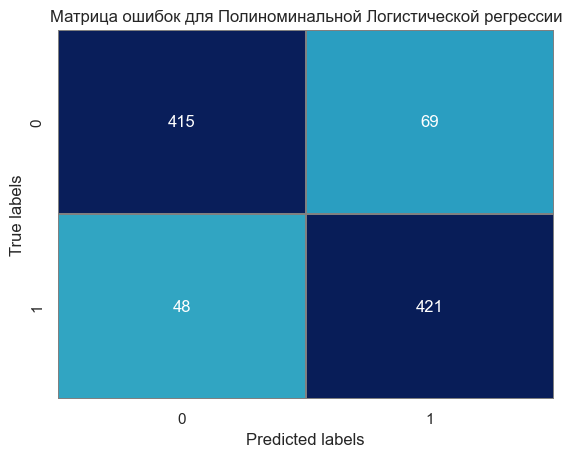

In [64]:
y_pred_lr = lr_random_search.best_estimator_.predict(X_valid)
s = sns.heatmap(confusion_matrix(y_valid, y_pred_lr), annot=True,
                fmt=".0f",  cmap="YlGnBu", center=0,
                linewidths=0.01, linecolor='gray', cbar=False)
s.set(ylabel="True labels", xlabel="Predicted labels",
      title="Матрица ошибок для Полиноминальной Логистической регрессии");

In [65]:
print(f" Полнота: {389 / (389 + 80):.3f}\n Точность: {389 / (389 + 86):.3f}\n"
      f" Правильность: {(398 + 389) / len(y_pred):.3f}")

 Полнота: 0.829
 Точность: 0.819
 Правильность: 0.826


<h4> Random Forest </h4>

In [66]:
rf = RandomForestClassifier()
cross_val_score(rf, X_tunable, y_tunable, cv=10).mean()

0.9254533186112133

In [67]:
rf_random_params = {
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': np.linspace(100, 2500, 13, dtype=int),
    'max_features': list(np.arange(1, X_valid.shape[1]+1, dtype=int)),
    'n_jobs': [4]
}
rf_random_search = RandomizedSearchCV(rf, rf_random_params, n_iter=25, cv=10)
rf_random_search.fit(X_tunable, y_tunable)
rf_random_search.best_score_, rf_random_search.best_params_

(0.9314084161452583,
 {'n_jobs': 4, 'n_estimators': 500, 'max_features': 1, 'max_depth': None})

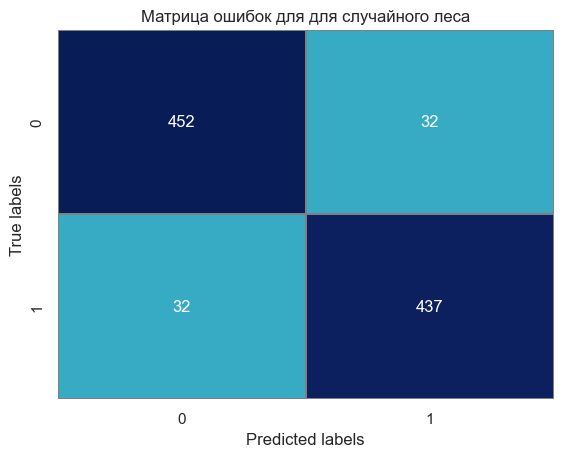

In [68]:
y_pred_rf = rf_random_search.best_estimator_.predict(X_valid)
s = sns.heatmap(confusion_matrix(y_valid, y_pred_rf), annot=True,
                fmt=".0f",  cmap="YlGnBu", center=0,
                linewidths=0.01, linecolor='gray', cbar=False)
s.set(ylabel="True labels", xlabel="Predicted labels",
      title="Матрица ошибок для для случайного леса");

In [69]:
print(f" Полнота: {423 / (423 + 46):.3f}\n Точность: {423 / (423 + 64):.3f}\n"
      f" Правильность: {(423 + 420) / len(y_pred):.3f}")

 Полнота: 0.902
 Точность: 0.869
 Правильность: 0.885


<h4>KNN</h4>

In [70]:
knn = KNeighborsClassifier()
print("Правильность с 5 соседями: ")
cross_val_score(knn, X_tunable, y_tunable, cv=8).mean()

Правильность с 5 соседями: 


0.8750469461527628

<h4> Настройка гиперпараметров метода KNN </h4>

In [71]:
knn_params_grid = {
    'n_neighbors': list(range(1, 32, 2))
}
knn_grid_search = GridSearchCV(knn, knn_params_grid, cv=10)
knn_grid_search.fit(X_tunable, y_tunable)
knn_grid_search.best_score_, knn_grid_search.best_params_

(0.9100503005766163, {'n_neighbors': 1})

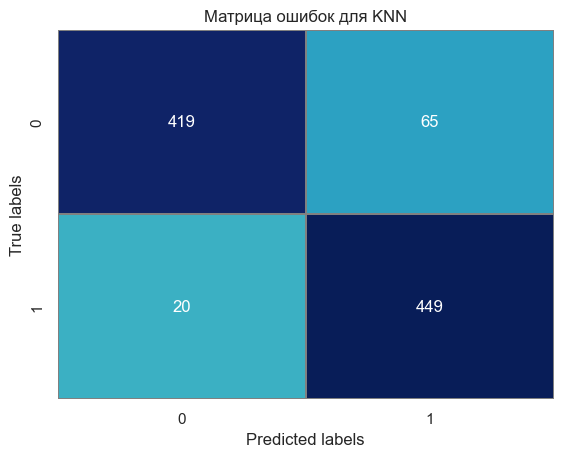

In [72]:
y_pred_knn = knn_grid_search.best_estimator_.predict(X_valid)
s = sns.heatmap(confusion_matrix(y_valid, y_pred_knn), annot=True,
                fmt=".0f",  cmap="YlGnBu", center=0,
                linewidths=0.01, linecolor='gray', cbar=False)
s.set(ylabel="True labels", xlabel="Predicted labels",
      title="Матрица ошибок для KNN");

In [73]:
print(f" Полнота: {recall_score(y_valid, y_pred_knn):.3f}\n Точность: "
      f"{precision_score(y_valid, y_pred_knn):.3f}\n"
      f" Правильность: {accuracy_score(y_valid, y_pred_knn):.3f}")

 Полнота: 0.957
 Точность: 0.874
 Правильность: 0.911


<h4> XGBoost</h4>

In [74]:
xgboost1 = XGBClassifier()
cross_val_score(xgboost1, X_valid, y_valid, cv=10).mean()

0.891940789473684

<h4>Настройка гиперпараметров</h5>

<h5>Настройка глубины деревьев</h5>

In [75]:
xgboost = XGBClassifier(learning_rate=0.2,
                        gamma=0,
                        n_estimators=1100,
                        subsample=0.7,
                        objective= 'binary:logistic',
                        nthread=4)

In [76]:
tuning_max_depth = {
    'max_depth': list(range(1, 10)),
    'min_child_weight': list(range(1, 6))
}

In [93]:
max_depth_search = GridSearchCV(xgboost, tuning_max_depth, n_jobs=4)
max_depth_search.fit(X_valid, y_valid)
max_depth_search.best_params_

{'max_depth': 4, 'min_child_weight': 4}

<h5> Настройка gamma </h5>

In [94]:
xgboost = XGBClassifier(learning_rate=0.2,
                        n_estimators=1100,
                        subsample=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        max_depth=4,
                        min_child_weight=4)

tuning_gamma = {
    'gamma': np.linspace(0, 15, 31)
}

In [95]:
gamma_search = GridSearchCV(xgboost, tuning_gamma)
gamma_search.fit(X_valid, y_valid);
gamma_search.best_score_, gamma_search.best_params_

(0.9034499862220997, {'gamma': 1.0})

<h5> Настройка гиперпараметров subsample и colsample_bytree </h5>

In [97]:
xgboost = XGBClassifier(learning_rate=0.2,
                        n_estimators=1100,
                        objective= 'binary:logistic',
                        gamma=1,
                        nthread=4,
                        max_depth=4,
                        min_child_weight=4)

tuning_subsample = {
    'subsample': np.arange(0.4, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1)
}

In [98]:
subsample_search = GridSearchCV(xgboost, tuning_subsample)
subsample_search.fit(X_tunable, y_tunable)
subsample_search.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.8999999999999999}

<h5> Подгонка параметров регуляризации </h5>

In [99]:
xgboost = XGBClassifier(learning_rate=0.2,
                        n_estimators=1100,
                        subsample=0.9,
                        colsample_bytree=0.7,
                        objective='binary:logistic',
                        nthread=4,
                        max_depth=4,
                        min_child_weight=2)

tuning_regularization = {
    'reg_alpha': [10 ** x for x in range(-4, 4)],
    'reg_lambda': [10 ** x for x in range(-4, 4)]
}

In [100]:
reg_search = GridSearchCV(xgboost, tuning_regularization)
reg_search.fit(X_tunable, y_tunable)
reg_search.best_params_

{'reg_alpha': 1, 'reg_lambda': 0.1}

In [101]:
xgboost = XGBClassifier(learning_rate=0.01,
                        n_estimators=3000,
                        subsample=0.9,
                        colsample_bytree=0.9,
                        objective='binary:logistic',
                        nthread=4,
                        max_depth=4,
                        min_child_weight=2,
                        reg_alpha=0.1,
                        reg_lambda=0.1)

xgboost.fit(X_tunable, y_tunable);

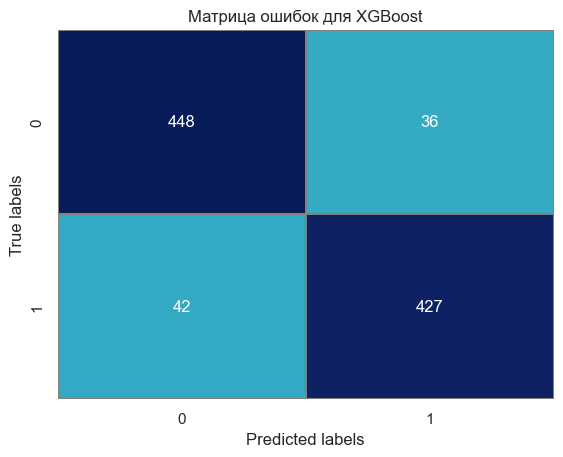

In [102]:
y_pred_xgboost = xgboost.predict(X_valid)
s = sns.heatmap(confusion_matrix(y_valid, y_pred_xgboost), annot=True,
                fmt=".0f",  cmap="YlGnBu", center=0,
                linewidths=0.01, linecolor='gray', cbar=False)
s.set(ylabel="True labels", xlabel="Predicted labels",
      title="Матрица ошибок для XGBoost");

In [103]:
print(f" Полнота: {recall_score(y_valid, y_pred_xgboost):.3f}\n Точность: "
      f"{precision_score(y_valid, y_pred_xgboost):.3f}\n"
      f" Правильность: {accuracy_score(y_valid, y_pred_xgboost):.3f}")

 Полнота: 0.910
 Точность: 0.922
 Правильность: 0.918


<h5> Сохранение модели для сайта </h5>

In [104]:
import pickle

file = open("D:\\ML\projects\site\Marketing_Campaign_model", 'wb')
pickle.dump(xgboost, file)